In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'C:\Users\TANISH\OneDrive\Desktop\Machine Learning\PROJECT\Financial Fraud Detection\Synthetic_Financial_datasets_log.csv')

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### Outlier

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [7]:
data['Z_score']=(data['amount']-data['amount'].mean())/data['amount'].std()

In [8]:
data.drop(data[(data['Z_score'] <= -2.5) | (data['Z_score'] >= 2.5)].index, inplace=True)

In [9]:
data.drop(['Z_score','nameOrig','nameDest'],axis=1,inplace=True)

In [10]:
data.describe

<bound method NDFrame.describe of          step      type     amount  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT    9839.64      170136.00       160296.36   
1           1   PAYMENT    1864.28       21249.00        19384.72   
2           1  TRANSFER     181.00         181.00            0.00   
3           1  CASH_OUT     181.00         181.00            0.00   
4           1   PAYMENT   11668.14       41554.00        29885.86   
...       ...       ...        ...            ...             ...   
1048570    95  CASH_OUT  132557.35      479803.00       347245.65   
1048571    95   PAYMENT    9917.36       90545.00        80627.64   
1048572    95   PAYMENT   14140.05       20545.00         6404.95   
1048573    95   PAYMENT   10020.05       90605.00        80584.95   
1048574    95   PAYMENT   11450.03       80584.95        69134.92   

         oldbalanceDest  newbalanceDest  isFraud  
0                  0.00            0.00        0  
1                  0.00            

### Data Visualization

In [11]:
fraud_counts=data['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    1023254
1        762
Name: count, dtype: int64


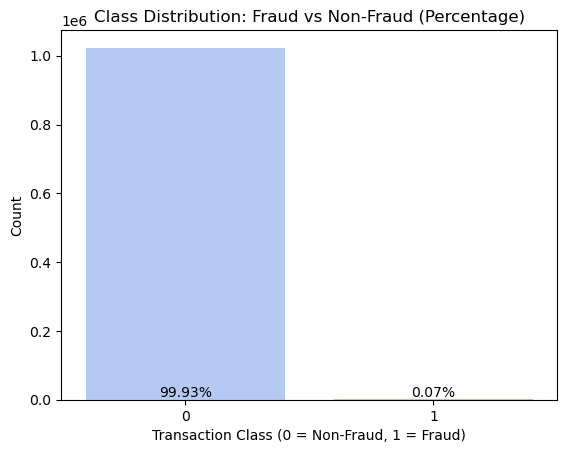

In [12]:
# 1. Distribution of Fraud vs Non-Fraud Transactions
# Calculate percentages
percentages = data['isFraud'].value_counts(normalize=True) * 100

# Plot with percentages
sns.countplot(data=data, x='isFraud', palette='coolwarm')
plt.title('Class Distribution: Fraud vs Non-Fraud (Percentage)')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')

# Add percentages on bars
for i, p in enumerate(percentages):
    plt.text(i, p, f'{p:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()


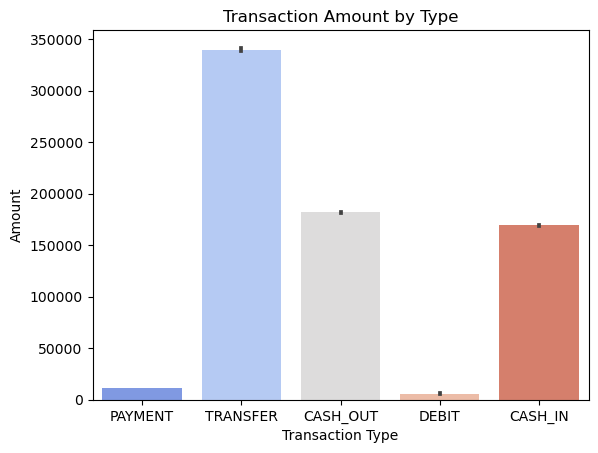

In [13]:
# 2. Distribution of Transaction Amounts
sns.barplot(data=data, x='type', y='amount', palette='coolwarm')
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

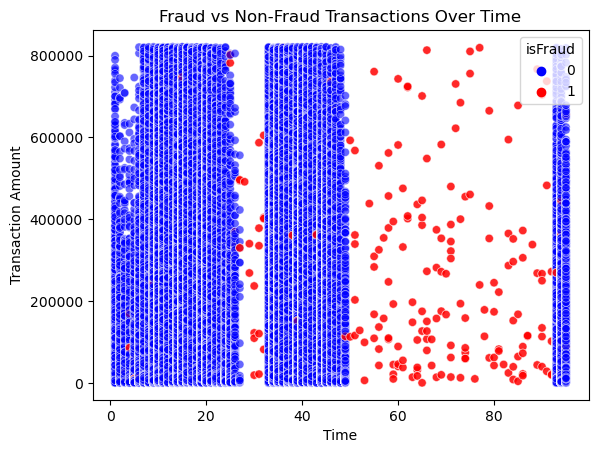

In [14]:
# 3. Fraud Transactions Over Time
sns.scatterplot(data=data, x='step', y='amount', hue='isFraud', alpha=0.6, palette={0: 'blue', 1: 'red'}, legend="full")
plt.title('Fraud vs Non-Fraud Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.show()

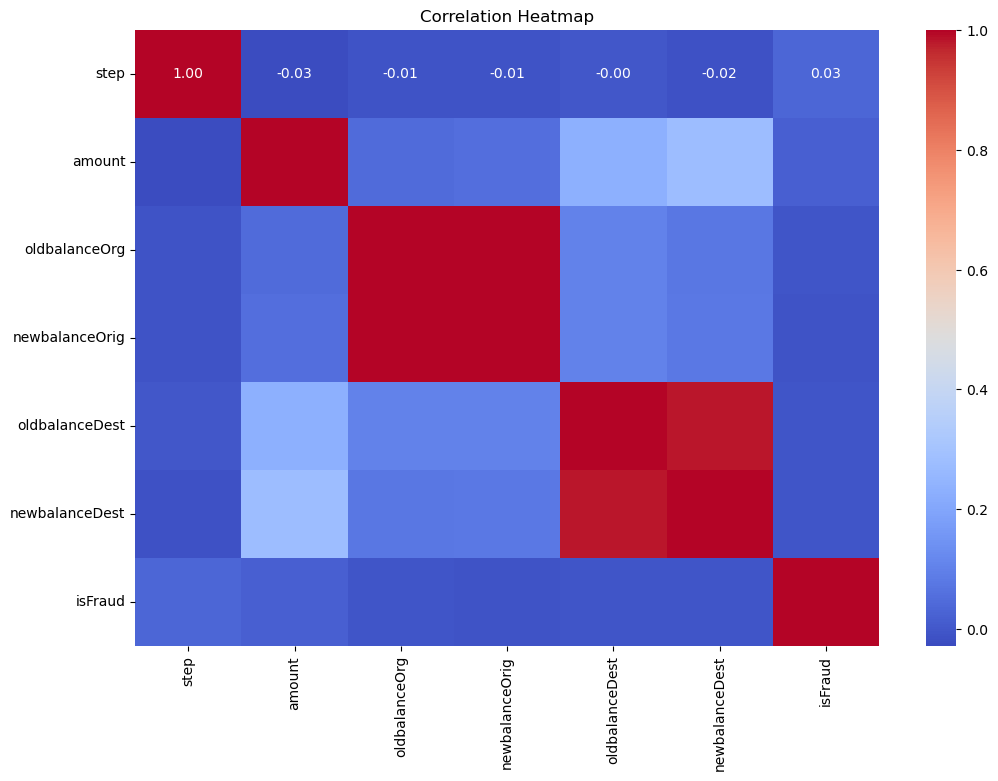

In [15]:
# 4. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr = data[numerical_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

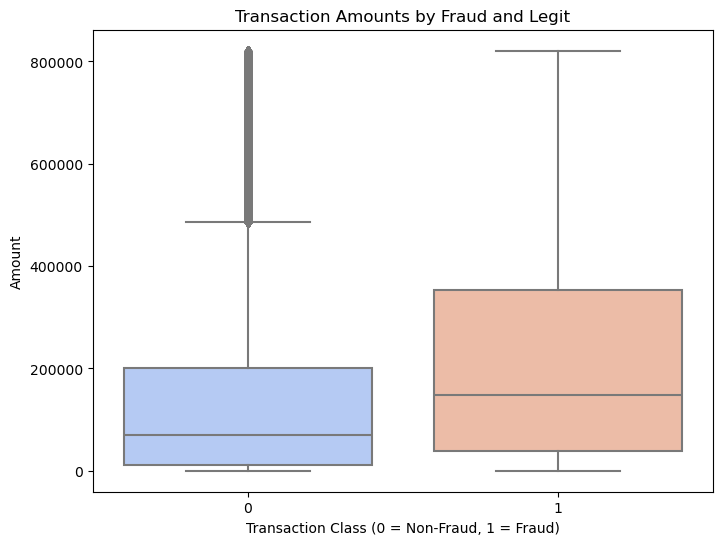

In [16]:
# 5. Boxplot: Transaction Amounts by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='isFraud', y='amount', palette='coolwarm')
plt.title('Transaction Amounts by Fraud and Legit')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Amount')
plt.show()

### Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
enc=LabelEncoder()

In [19]:
data['type']=enc.fit_transform(data['type'])

In [22]:
x=data.drop('isFraud',axis=1)
y=data['isFraud']

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=35)

### Checking in Loop Logistic Regression, Naive Bayes, Decision Tree and KNN

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
lis=[LogisticRegression,GaussianNB,DecisionTreeClassifier,KNeighborsClassifier]

In [27]:
for i in lis:
    model=i()
    print(i)
    print(cross_val_score(model,x,y,cv=5).mean())

<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.9992353637645646
<class 'sklearn.naive_bayes.GaussianNB'>
0.47472106764747546
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.7907784562663019
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.9994111421965031


In [28]:
lor=LogisticRegression()

In [29]:
lor.fit(x,y)

LogisticRegression()

In [30]:
lor.score(x,y)

0.9992470820768425

In [31]:
lor.score(x_train,y_train)

0.9992229471924956

In [32]:
lor.score(x_test,y_test)

0.9993033967546101

In [33]:
lor.predict([[9600, 9000, 0, 0, 0, 5, 0]])

array([0], dtype=int64)

In [34]:
lor.predict([[700, 32000, 400, 10, 0, 2000, 0]])

array([0], dtype=int64)

In [35]:
lor.predict([[295000, 67000, 7300, 621300, 7860, 95100, 32140]])

array([0], dtype=int64)

In [36]:
data['Prediction']=lor.predict(x)

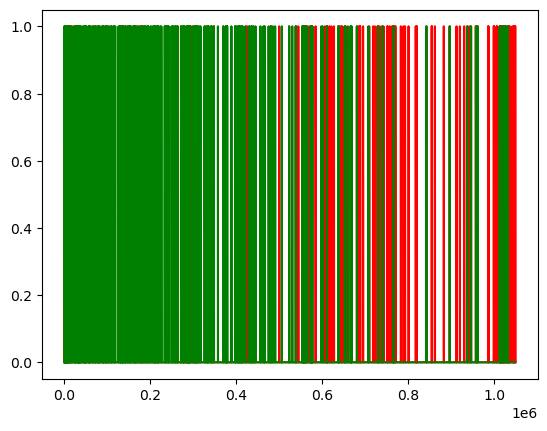

In [37]:
plt.plot(data['isFraud'], 'r')
plt.plot(data['Prediction'], 'g')